# Cardio Prediction Dataset Pytorch

## Nome: Thiago Rafael Pellizzari
## Matricula: 92119107

COLAB: ???

Dataset Referência: https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

O conjunto de dados classifica cada uma das instâncias como `Cardiaco` ou `Não Cardiaco`
.

### Attribute Information

Age | Objective Feature | age | int (days)

Height | Objective Feature | height | int (cm) 

Weight | Objective Feature | weight | float (kg)

Gender | Objective Feature | gender | categorical code 

Systolic blood pressure | Examination Feature | ap_hi | int |

Diastolic blood pressure | Examination Feature | ap_lo | int |

Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |

Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |

Smoking | Subjective Feature | smoke | binary |

Alcohol intake | Subjective Feature | alco | binary |

Physical activity | Subjective Feature | active | binary |\

Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

In [86]:
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/thiagoPelissari/public_files/main/cardio_train.csv', sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Tratando alguns outliers


In [87]:
#Deletando Pressão maiores que 400 pois o record de pressão é 370/360. Aparentemente alguns dados não foram gravados corretamente
df=df[~(df.ap_hi>=400)] 
df=df[ ~(df.ap_lo>300)]

# Pegando o valor absoluto, transformando negativo em positivo, pois se foi registrado como negativo obviamente foi um erro
df[(df.ap_hi<0)]=df[(df.ap_hi<0)].abs()

# deleta a linha com  ap_lo <0 
df=df[~(df.ap_lo<0)]


# Removendo as linhas aonde a ap_hi é menor que a ap_lo

df=df[~(df.ap_hi<df.ap_lo)]

print(df.shape)

df.describe().transpose()


(68733, 13)


,count,mean,std,min,25%,50%,75%,max
id,68733.0,49972.835305,28842.913002,0.0,25003.0,50010.0,74861.0,99999.0
age,68733.0,19464.237295,2468.403083,10798.0,17657.0,19701.0,21324.0,23713.0
gender,68733.0,1.348668,0.476552,1.0,1.0,1.0,2.0,2.0
height,68733.0,164.359522,8.190867,55.0,159.0,165.0,170.0,250.0
weight,68733.0,74.116385,14.333108,11.0,65.0,72.0,82.0,200.0
ap_hi,68733.0,126.668733,16.733428,12.0,120.0,120.0,140.0,309.0
ap_lo,68733.0,81.255103,9.646400,0.0,80.0,80.0,90.0,182.0
cholesterol,68733.0,1.364628,0.678887,1.0,1.0,1.0,2.0,3.0
gluc,68733.0,1.225583,0.571432,1.0,1.0,1.0,1.0,3.0
smoke,68733.0,0.087920,0.283180,0.0,0.0,0.0,0.0,1.0


# Preparação dos dados

In [88]:
# Merge Weight e Height na feature: BMI (Índice de massa corporal)
df['BMI']=round(df['weight']/((df['height']/100)**2),2)

# Convert Gender to binary where 0: Female and 1: Male
df['gender']=df['gender']-1

## Discretizando os dados

In [89]:
# # Creating Dummy Variable for Cholestrol
# d1=pd.get_dummies(df['cholesterol'],prefix='chol',drop_first=True)

# # Creating Dummy Variable for Glucose
# d2=pd.get_dummies(df['gluc'],prefix='gluc',drop_first=True)

# df=pd.concat([df,d1,d2],axis=1)

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,1,168,62.0,110,80,1,1,0,0,1,0,21.97
1,1,20228,0,156,85.0,140,90,3,1,0,0,1,1,34.93
2,2,18857,0,165,64.0,130,70,3,1,0,0,0,1,23.51
3,3,17623,1,169,82.0,150,100,1,1,0,0,1,1,28.71
4,4,17474,0,156,56.0,100,60,1,1,0,0,0,0,23.01


In [90]:
# deletando features repetidas
df.drop(['id','cholesterol','gluc'],axis=1,inplace=True)

# Drop Height and Weight
# df.drop(['height','weight'],axis=1,inplace=True)

# df.drop(['gender', 'age','ap_hi','ap_lo','smoke', 'alco', 'active','BMI','height'],axis=1,inplace=True)

df.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,BMI
0,18393,1,168,62.0,110,80,0,0,1,0,21.97
1,20228,0,156,85.0,140,90,0,0,1,1,34.93
2,18857,0,165,64.0,130,70,0,0,0,1,23.51
3,17623,1,169,82.0,150,100,0,0,1,1,28.71
4,17474,0,156,56.0,100,60,0,0,0,0,23.01


# Aplicando algoritmos PyTorch

## Import `torch`

Esses são os imports essenciais para iniciarmos o nosso modelo.

In [91]:
import torch
import torch.nn as nn
from torch.autograd import Variable

Text(0.5, 1.0, 'Data')

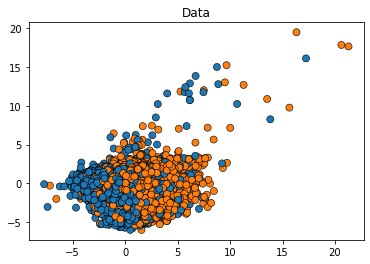

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
X = df.drop('cardio', axis=1)
y = df[['cardio']]
y = y.to_numpy().reshape(-1)

# NORMALIZANDO OS DADOS - ISSO AQUI INFLUENCIA DIRETAMENTE NA ACCURACY
# Scale the features
scaler = StandardScaler()
scaler.fit_transform(X)
X_normalized = scaler.transform(X)

pca = PCA(n_components=2) #O valor que colocamos aqui tem que ser n-1 no param x_pca[:,2] no plt.scatter abaixo
pca.fit(X_normalized)
x_pca = pca.transform(X_normalized)

X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=123)
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=y, marker='o', s=50, edgecolor='k', legend=False).set_title("Data")


## Definindo o Modelo

Um modelo é definido como uma extensão da classe `Module`. Os métodos principais são o método construtor da classe `__init__` que inicializa os elementos da rede e o método `forward`,  

In [93]:
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 2)
        
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        # x = torch.sigmoid(self.layer3(x))        # você pode querer empregar a sigmoid ou a softmax
        x = torch.softmax(self.layer3(x), dim=1)
        return x

## Inicialização

Não temos aqui uma função `compile` como no `TensorFlow` mas precisamos inicializar nosso modelo, e definir a função de perda e o otimizador que desejamos empregar.

Você encontrará no `PyTorch` otimizadores e funções de perda semelhantes a que vimos no `TensorFlow` como o Adam, SGD para otimizadores e CrossEntropyLoss, BCELoss (Binary Cross Entropy Loss) e MSELoss para funções de perda.

In [94]:
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()
model

Model(
  (layer1): Linear(in_features=2, out_features=50, bias=True)
  (layer2): Linear(in_features=50, out_features=50, bias=True)
  (layer3): Linear(in_features=50, out_features=2, bias=True)
)

No `PyTorch` precisamos transformar explicitamente nossas entradas em tensores, tendo ainda atenção nos tipos de dados suportados por cada módulo,

In [95]:
print(type(X_train))
print(X_train.dtype)

X_train = Variable(torch.from_numpy(X_train)).float()
y_train = Variable(torch.from_numpy(y_train)).long()
X_test  = Variable(torch.from_numpy(X_test)).float()
y_test  = Variable(torch.from_numpy(y_test)).long()

<class 'numpy.ndarray'>
float64


In [96]:
model(X_train)[0:10] # exibindo somente as 10 primeiras ocorrências

tensor([[0.4173, 0.5827],
        [0.4813, 0.5187],
        [0.4995, 0.5005],
        [0.5006, 0.4994],
        [0.5810, 0.4190],
        [0.4328, 0.5672],
        [0.5036, 0.4964],
        [0.5446, 0.4554],
        [0.5727, 0.4273],
        [0.5146, 0.4854]], grad_fn=<SliceBackward0>)

para aplicar a uma única instância dos dados é necessário fazer um reshape dos dados compatibilizando a forma de instância com o conjunto de dados,

In [97]:
print('Check shape X_train: ', X_train.shape)
print('Check shape X_train[0]: ', X_train[0].shape)
print('Check shape X_train[0].reshape([1,2]): ', X_train[0].reshape([1,2]).shape)

model(X_train[0].reshape([1,2]))

Check shape X_train:  torch.Size([48113, 2])
Check shape X_train[0]:  torch.Size([2])
Check shape X_train[0].reshape([1,2]):  torch.Size([1, 2])


tensor([[0.4173, 0.5827]], grad_fn=<SoftmaxBackward0>)

## Treinamento

O treinamento é bastante semelhante ao que vimos no modelo de subclasses do `TensorFlow` e segue essencialmente:

```
for epoch in EPOCHS:

    # Forward da rede
    y_pred = model(X_train)

    # Cálculo do erro
    loss = loss_fn(y_pred, y_train)
    
    # Zera os gradientes anteriores do otimizador
    optimizer.zero_grad()

    # Recupera os gradientes 
    loss.backward()

    # Atualiza os parâmetros da rede com base nos gradientes
    optimizer.step()
```
Sendo os demais comandos opcionais para exibição do histórico do treinamento.


In [98]:
import tqdm # somente para display da evolução do loop

EPOCHS  = 100

loss_list = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    
    #OBS: Precisei alterar a loss da forma abaixo: ANTES: 
    loss = loss_fn(y_pred, y_train)
    # loss = loss_fn(y_pred, torch.max(y_train, 1)[1])
    
    loss_list[epoch] = loss.item()
    
    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:04<00:00, 24.45it/s]


### Curva de Aprendizado

Obtemos então a Curva de Aprendizado. Embora não faça parte do treinamento da rede é algo comumente necessário para o ajuste do modelo e que frequentemente implementamos.

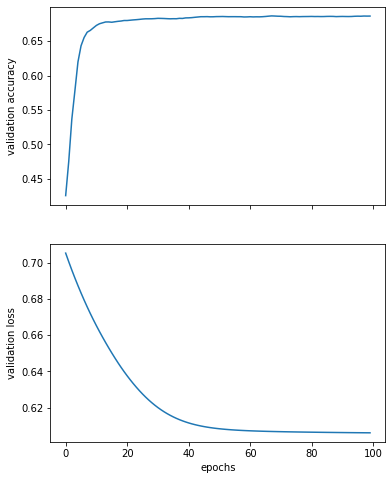

In [99]:
import matplotlib.pyplot as plt

def plot_history(loss_list,  accuracy_list):
    fig, (ax1, ax2) = plt.subplots(2, figsize=(6, 8), sharex=True)
    ax1.plot(accuracy_list)
    ax1.set_ylabel("validation accuracy")
    ax2.plot(loss_list)
    ax2.set_ylabel("validation loss")
    ax2.set_xlabel("epochs")
    plt.show()

    return

plot_history(loss_list,  accuracy_list) 

## Predição

Podemos agora aplicar o nosso modelo para todo o nosso conjunto de dados e ver os acertos da classificação obtida pela rede.

In [100]:
x_pca = x_pca
X_ = Variable(torch.from_numpy(x_pca)).float()
y_pred = model(X_)

In [101]:
y_pred = np.argmax( y_pred.detach().numpy(), axis=1 )

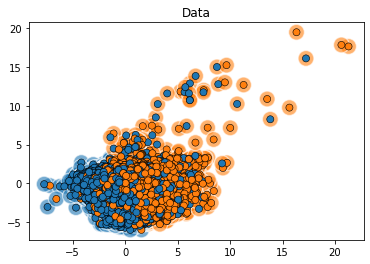

In [102]:
import seaborn as sns
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=y_pred, marker='o', s=250, legend=False, alpha=0.6)
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=y, marker='o', s=50, edgecolor='k', legend=False).set_title("Data")

plt.show()